# <strong>Fashion Outfit Recommendation System</strong>

This notebook implements a system to recommend outfits based on a user's skin tone and preferences. The system involves the following steps:   
1. **Dataset Cleaning and Processing**
2. **Skin Tone Classification from Image**
3. **Using Skin Tone to Decide Colors**
4. **Generating and Displaying Outfit Combinations**
---

## 1. Dataset Cleaning and Processing
In this process, we would like to clean the dataset and prepare it for filtering based on input, such as gender, season, usage, and color.

In [1]:
import pandas as pd 
import numpy as np
import random

#Load the dataset
print ("Dataset Overview:")
data = pd.read_csv(r"C:\EID\fashion-recommender\fashion-dataset\styles.csv", on_bad_lines="skip")
data.sample(10)

Dataset Overview:


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
44108,13039,Women,Footwear,Shoes,Heels,White,Winter,2012.0,Casual,Inc 5 Women Casual White Flats
42007,15960,Men,Accessories,Ties,Ties,Navy Blue,Fall,2011.0,Formal,Turtle Men Solid Navy Blue Ties
32331,48496,Women,Apparel,Bottomwear,Trousers,Black,Winter,2011.0,Casual,French Connection Women Black Trousers
26426,37479,Women,Accessories,Watches,Watches,White,Winter,2016.0,Casual,Esprit Women White Watch
32836,45380,Women,Footwear,Shoes,Flats,Yellow,Winter,2012.0,Casual,Rocia Women Yellow Sandals
39740,57586,Women,Personal Care,Lips,Lipstick,Brown,Spring,2017.0,Casual,Lotus Herbals Sand Storm Lipstick 181
12340,13918,Women,Footwear,Shoes,Casual Shoes,Black,Fall,2011.0,Casual,Nike Women Serenity Black Casual Shoes
23180,9637,Men,Apparel,Topwear,Shirts,Black,Fall,2011.0,Casual,Indigo Nation Men Hot Stepper Black Shirts
41239,3547,Men,Footwear,Shoes,Casual Shoes,Black,Winter,2015.0,Casual,Skechers Men's Lifestyle Black Shoe
32622,8467,Women,Apparel,Topwear,Shirts,Blue,Fall,2011.0,Casual,Scullers For Her Women Scarf Shirt Blue Tops


In [2]:
#Drop the unnecessary columns
data.drop(["year", "productDisplayName"], axis=1, inplace=True)

In [3]:
#Checking the missing values inside the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              44424 non-null  int64 
 1   gender          44424 non-null  object
 2   masterCategory  44424 non-null  object
 3   subCategory     44424 non-null  object
 4   articleType     44424 non-null  object
 5   baseColour      44409 non-null  object
 6   season          44403 non-null  object
 7   usage           44107 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.7+ MB


In [4]:
#Fill the missing values and standardize column names
data["baseColour"] = data["baseColour"].fillna("Unknown")
data.columns = [col.strip().lower() for col in data.columns]

# Check unique values for key features
print("\nUnique values in gender:", data['gender'].unique())
print("Unique values in season:", data['season'].unique())
print("Unique values in usage:", data['usage'].unique())


Unique values in gender: ['Men' 'Women' 'Boys' 'Girls' 'Unisex']
Unique values in season: ['Fall' 'Summer' 'Winter' 'Spring' nan]
Unique values in usage: ['Casual' 'Ethnic' 'Formal' 'Sports' nan 'Smart Casual' 'Travel' 'Party'
 'Home']


In [5]:
# Filter Column Values with only specific Values in gender, masterCategory and SubCategory
master_category = data['mastercategory'].unique()
sub_category = data['subcategory'].unique()
gender = data['gender'].unique()
season = data['season'].unique()
usage =  data['usage'].unique()

print(master_category,sub_category,gender,season, usage, sep="\n")

['Apparel' 'Accessories' 'Footwear' 'Personal Care' 'Free Items'
 'Sporting Goods' 'Home']
['Topwear' 'Bottomwear' 'Watches' 'Socks' 'Shoes' 'Belts' 'Flip Flops'
 'Bags' 'Innerwear' 'Sandal' 'Shoe Accessories' 'Fragrance' 'Jewellery'
 'Lips' 'Saree' 'Eyewear' 'Nails' 'Scarves' 'Dress'
 'Loungewear and Nightwear' 'Wallets' 'Apparel Set' 'Headwear' 'Mufflers'
 'Skin Care' 'Makeup' 'Free Gifts' 'Ties' 'Accessories' 'Skin'
 'Beauty Accessories' 'Water Bottle' 'Eyes' 'Bath and Body' 'Gloves'
 'Sports Accessories' 'Cufflinks' 'Sports Equipment' 'Stoles' 'Hair'
 'Perfumes' 'Home Furnishing' 'Umbrellas' 'Wristbands' 'Vouchers']
['Men' 'Women' 'Boys' 'Girls' 'Unisex']
['Fall' 'Summer' 'Winter' 'Spring' nan]
['Casual' 'Ethnic' 'Formal' 'Sports' nan 'Smart Casual' 'Travel' 'Party'
 'Home']


In [6]:
# Filter Column Values with only specific Values in gender
data = data[data['gender'].isin(["Men","Women"])]
data = data[data['mastercategory'].isin(['Apparel','Footwear'])]
data = data[~data['subcategory'].isin(['Innerwear','Loungewear and Nightwear'])]
data = data[~data['usage'].isin([None,'Home'])]
print(data['subcategory'].unique())

['Topwear' 'Bottomwear' 'Shoes' 'Flip Flops' 'Sandal' 'Saree' 'Dress'
 'Apparel Set']


In [7]:
# Final Data Frame 
data.sample (10)

,id,gender,mastercategory,subcategory,articletype,basecolour,season,usage
42948,16529,Men,Apparel,Topwear,Shirts,Yellow,Fall,Casual
6737,12043,Men,Apparel,Topwear,Shirts,White,Fall,Formal
12383,47032,Women,Apparel,Topwear,Kurtas,Red,Fall,Ethnic
29337,44402,Men,Footwear,Shoes,Sports Shoes,White,Fall,Sports
18466,14085,Men,Apparel,Topwear,Sweaters,White,Fall,Casual
29606,19455,Men,Apparel,Topwear,Tshirts,Black,Summer,Casual
43301,20682,Men,Footwear,Shoes,Casual Shoes,Brown,Winter,Casual
23201,33049,Women,Apparel,Topwear,Kurtas,Blue,Summer,Ethnic
43284,34276,Women,Apparel,Topwear,Dupatta,Olive,Summer,Ethnic
1090,56813,Women,Apparel,Topwear,Kurtis,Multi,Summer,Ethnic


## 2. Skin Tone Classification from Image 
The skin tone classification uses a pre-built function to detect the skin tone from the user's image input.

In [22]:
from IPython.display import display, HTML

def display_box(face, width=200, height=100):
    """
    Displays a colored box representing the detected skin tone.

    Args:
        face (list): [Hex color code, Skin tone name]
        width (int, optional): Width of the box (default is 200px).
        height (int, optional): Height of the box (default is 100px).
    """
    
    if not face or not face[0] or not face[1]:  # Check for None or missing values
        display(HTML("<p style='color: red; font-weight: bold;'>No skin tone detected.</p>"))
        return

    # Extract hex color and skin tone name
    hex_color, tone_name = face

    # Display HTML box with the detected skin tone
    display(HTML(f"""
        <div style="
            width:{width}px; 
            height:{height}px; 
            background-color:{hex_color}; 
            border: 2px solid black; 
            border-radius: 10px; 
            text-align: center; 
            display: flex; 
            align-items: center; 
            justify-content: center; 
            font-size: 16px; 
            font-weight: bold; 
            color: white; 
            text-shadow: 1px 1px 2px black;
        ">
            {tone_name}
        </div>
    """))


Analyzing image: C:\EID\fashion-recommender\ai-system\photo_2025-02-26_04-58-59.jpg


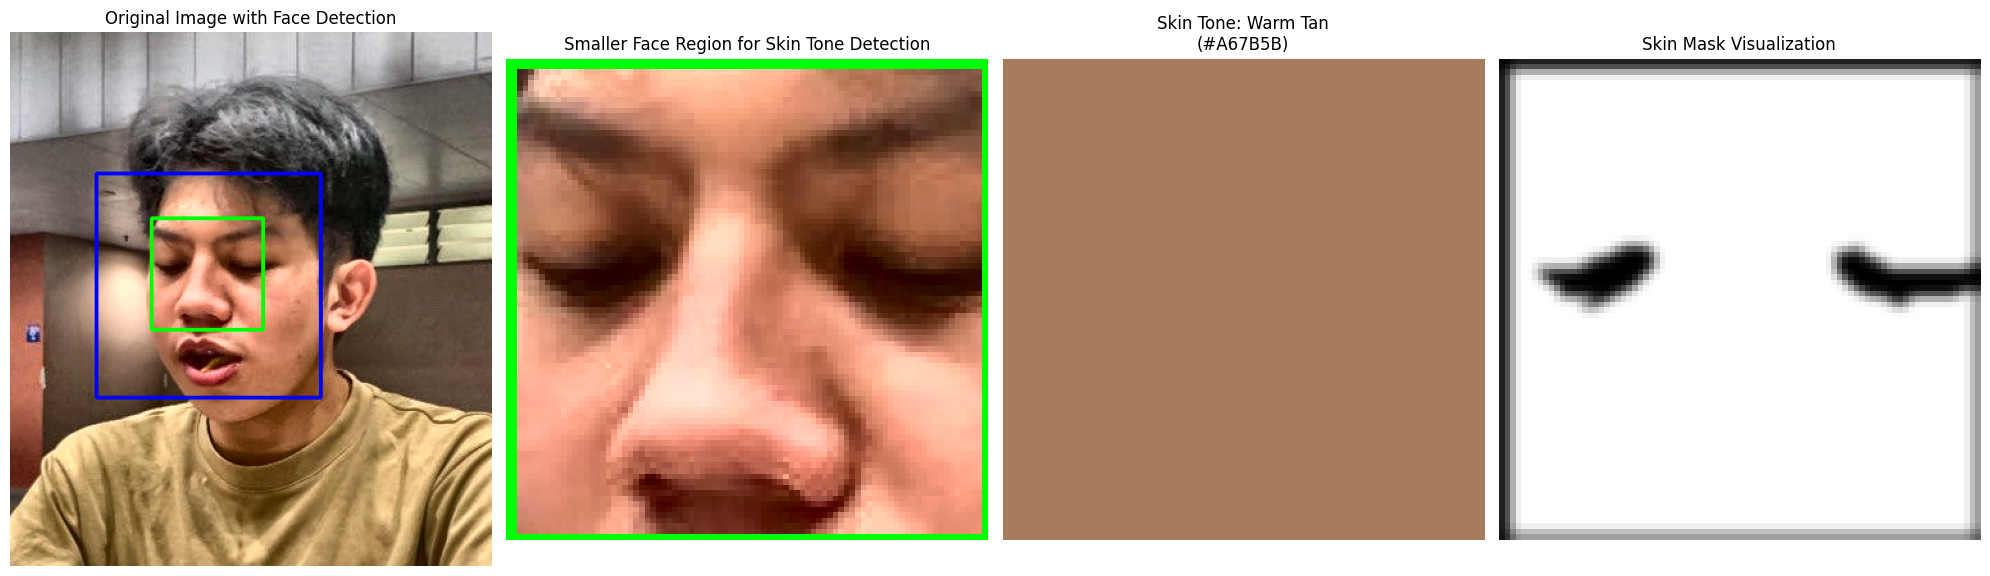


✅ Detected skin tone: Warm Tan
✅ Hex color: #A67B5B


In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageColor
import os

# Skin tone mapping based on hex colors
skin_tones = {
    "#2C1B18": "Deepest Skin",
    "#3A1D1A": "Espresso Brown",
    "#422811": "Very Deep",
    "#4F2B1D": "Dark Mahogany",
    "#513B2E": "Deep Brown",
    "#5D4037": "Warm Deep Brown",
    "#6F4E37": "Rich Espresso",
    "#795548": "Dark Chocolate",
    "#8D6748": "Medium Brown",
    "#9D7A54": "Golden Brown",
    "#A67B5B": "Warm Tan",
    "#B68E6D": "Bronzed Tan",
    "#C19A6B": "Honey Beige",
    "#D2A679": "Caramel",
    "#D9B48F": "Golden Beige",
    "#E5C8A6": "Medium Fair",
    "#E7C1B8": "Peach Fair",
    "#F3DAD6": "Warm Fair",
    "#F5DDC8": "Golden Fair",
    "#FAE3D9": "Ivory",
    "#FBE9E7": "Very Fair",
    "#FDF7F2": "Pale",
    "#FFF5ED": "Porcelain",
}

def detect_skin_tone(image):
    """
    Detects the closest matching skin tone from an image.
    """
    if image is None:
        print("Error: Image not found.")
        return None, "Unknown", None

    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_skin = np.array([0, 30, 60], dtype=np.uint8)
    upper_skin = np.array([35, 255, 255], dtype=np.uint8)

    skin_mask = cv2.inRange(image_hsv, lower_skin, upper_skin)
    skin_mask = cv2.GaussianBlur(skin_mask, (5, 5), 0)

    skin_pixels = image[skin_mask > 0]

    if len(skin_pixels) == 0:
        print("⚠️ Warning: No skin pixels detected. Adjusting HSV range...")
        lower_skin = np.array([0, 15, 40], dtype=np.uint8)
        upper_skin = np.array([35, 240, 240], dtype=np.uint8)
        skin_mask = cv2.inRange(image_hsv, lower_skin, upper_skin)
        skin_pixels = image[skin_mask > 0]

        if len(skin_pixels) == 0:
            print("❌ No skin pixels detected even after adjustment. Returning None.")
            return None, "Unknown", skin_mask

    average_skin_color = np.mean(skin_pixels, axis=0)

    # Convert BGR to RGB for correct hex code
    average_skin_rgb = average_skin_color[::-1]
    
    avg_color_hex = "#{:02x}{:02x}{:02x}".format(
        int(average_skin_rgb[0]), int(average_skin_rgb[1]), int(average_skin_rgb[2])
    )

    # For comparison, need to convert to RGB because ImageColor.getrgb returns RGB
    avg_color_rgb = np.array(ImageColor.getrgb(avg_color_hex))

    closest_tone_hex = min(
        skin_tones.keys(),
        key=lambda hex_code: np.linalg.norm(avg_color_rgb - np.array(ImageColor.getrgb(hex_code)))
    )

    return closest_tone_hex, skin_tones[closest_tone_hex], skin_mask

class FaceCropper:
    def __init__(self):
        self.face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

    def apply_brightness_correction(self, image):
        """
        Corrects brightness using Contrast Limited Adaptive Histogram Equalization (CLAHE).
        """
        lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
        l, a, b = cv2.split(lab)

        clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
        l_equalized = clahe.apply(l)

        lab_equalized = cv2.merge((l_equalized, a, b))
        corrected_image = cv2.cvtColor(lab_equalized, cv2.COLOR_LAB2BGR)

        return corrected_image

    def generate(self, image_path, show_result=True):
        """
        Detects faces in an image, applies brightness correction, crops a **smaller face region**, 
        and determines the closest skin tone.
        """
        img = cv2.imread(image_path)
        if img is None:
            print(f"Error: Unable to load image from {image_path}")
            return None, "Unknown"

        img = self.apply_brightness_correction(img)

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = self.face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(100, 100))

        if len(faces) == 0:
            print('Failed to detect faces')
            return None, "Unknown"

        # Select the largest face
        largest_face = max(faces, key=lambda face: face[2] * face[3])
        x, y, w, h = largest_face
        
        # Get a smaller region of the face specifically for skin tone detection
        # Focus on the cheek area, avoiding eyebrows, eyes, lips
        crop_x = int(x + 0.25 * w)
        crop_y = int(y + 0.2 * h) 
        crop_w = int(w * 0.5)
        crop_h = int(h * 0.5)
        
        cropped_face = img[crop_y:crop_y + crop_h, crop_x:crop_x + crop_w]
        
        # Rectangle for visualization
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Main face
        cv2.rectangle(img, (crop_x, crop_y), (crop_x + crop_w, crop_y + crop_h), (0, 255, 0), 2)  # Skin region

        # Detect skin tone
        skin_tone, skin_color, skin_mask = detect_skin_tone(cropped_face)

        if show_result and skin_tone is not None:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            cropped_face_rgb = cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB)
            
            fig, ax = plt.subplots(1, 4, figsize=(20, 6))

            ax[0].imshow(img_rgb)
            ax[0].axis('off')
            ax[0].set_title('Original Image with Face Detection')

            ax[1].imshow(cropped_face_rgb)
            ax[1].axis('off')
            ax[1].set_title('Smaller Face Region for Skin Tone Detection')

            # Display the detected tone color
            detected_rgb = ImageColor.getrgb(skin_tone)
            color_block = np.ones((100, 100, 3)) * np.array(detected_rgb) / 255.0
            
            ax[2].imshow(color_block)
            ax[2].axis('off')
            ax[2].set_title(f"Skin Tone: {skin_color}\n({skin_tone})")

            ax[3].imshow(skin_mask, cmap='gray')
            ax[3].axis('off')
            ax[3].set_title("Skin Mask Visualization")

            plt.tight_layout()
            plt.show()

        return skin_tone, skin_color

def analyze_image(image_path, show_details=True):
    """
    Wrapper function to analyze an image and print results
    """
    print(f"Analyzing image: {image_path}")
    
    # Create and run the face detection
    detector = FaceCropper()
    detected_tone_hex, detected_tone_name = detector.generate(image_path, show_result=show_details)
    
    if detected_tone_hex:
        print(f"\n✅ Detected skin tone: {detected_tone_name}")
        print(f"✅ Hex color: {detected_tone_hex}")
    else:
        print("\n❌ Could not detect skin tone.")
    
    return detected_tone_hex, detected_tone_name

# Example usage
if __name__ == "__main__":
    # Provide the correct image path
    image_path = r"C:\EID\fashion-recommender\ai-system\photo_2025-02-26_04-58-59.jpg"
    detected_tone_hex, detected_tone_name = analyze_image(image_path)


=== WITH COLOR CORRECTION ===
Analyzing image: C:\EID\fashion-recommender\ai-system\tst,small,845x845-pad,1000x1000,f8f8f8.jpg


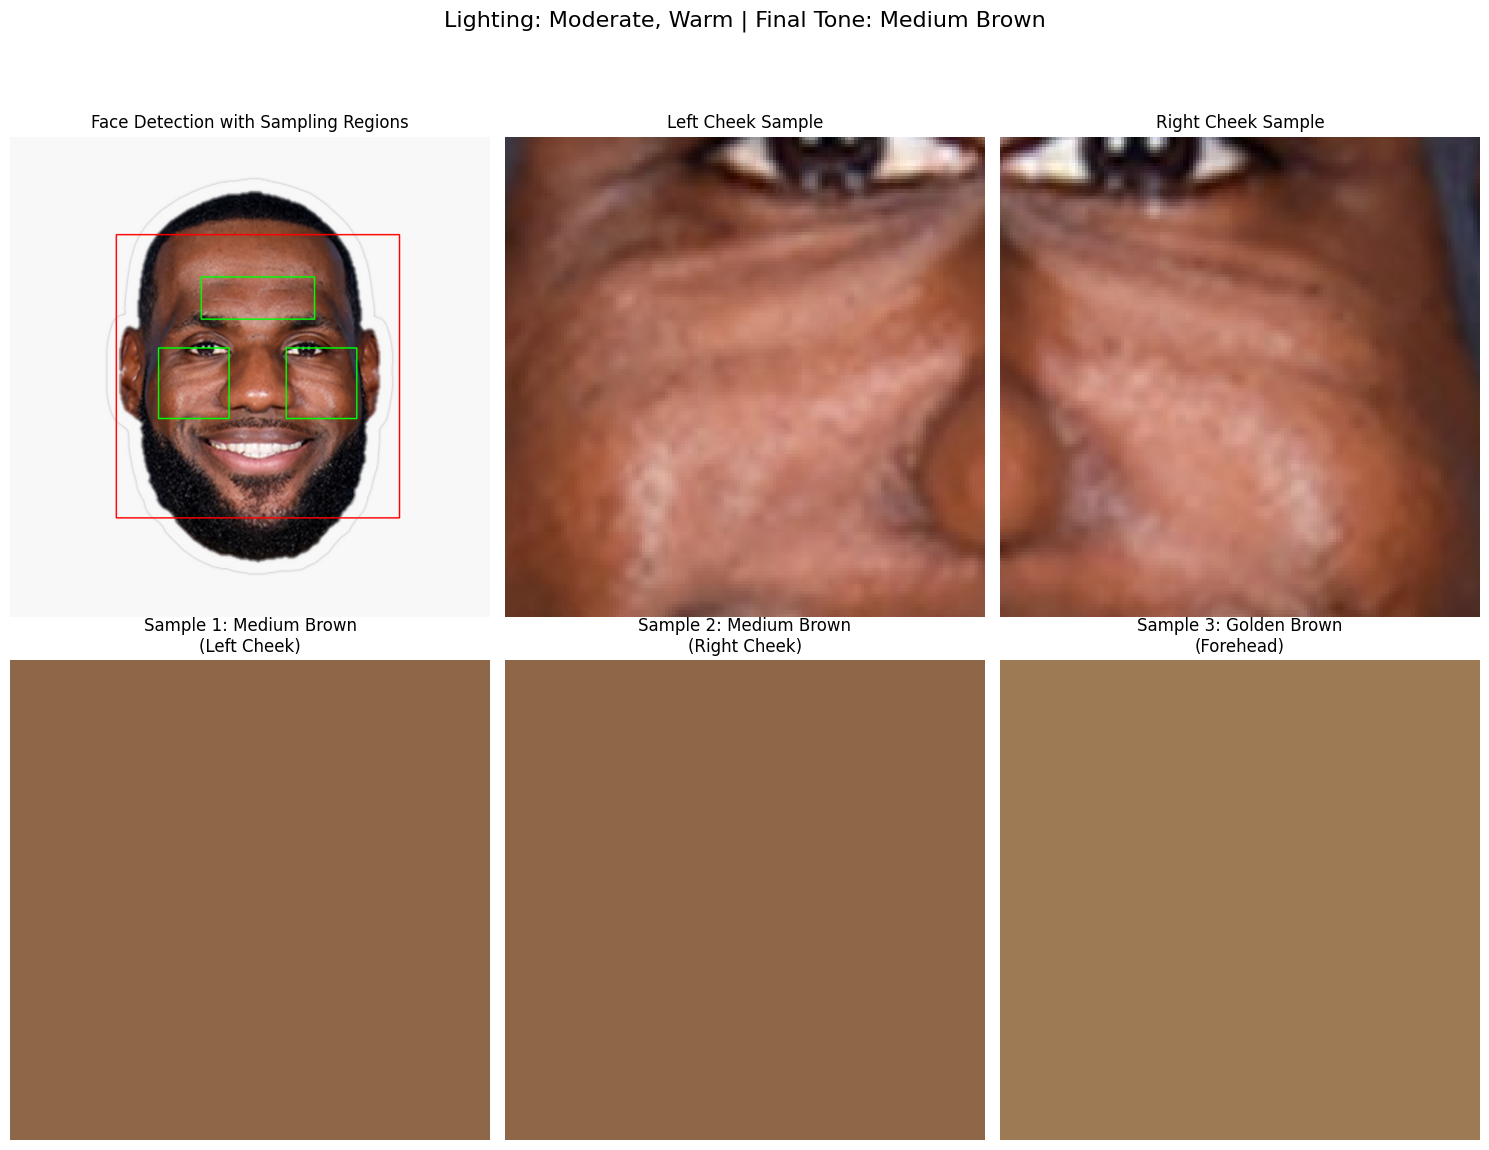


✅ Detected skin tone: Medium Brown
✅ Hex color: #8D6748
📸 Lighting: Moderate, Warm tone
   (luminance: 123.0, temp ratio: 0.70)

=== WITHOUT COLOR CORRECTION ===
Analyzing image: C:\EID\fashion-recommender\ai-system\tst,small,845x845-pad,1000x1000,f8f8f8.jpg


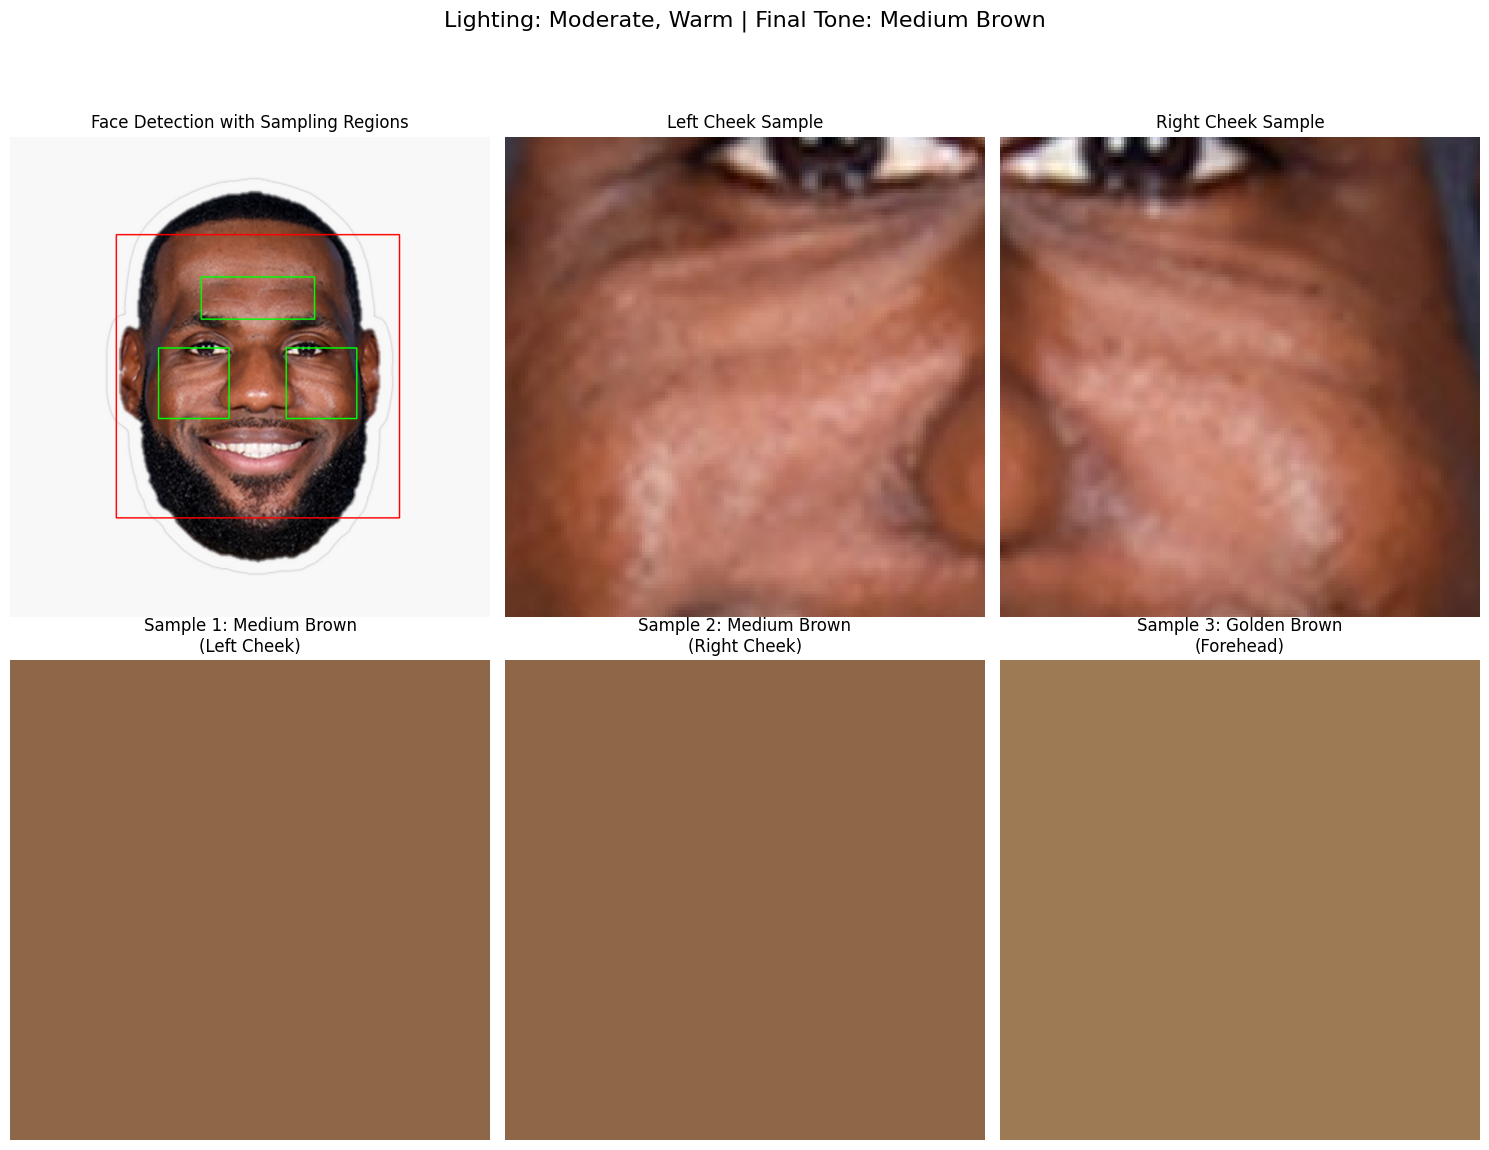


✅ Detected skin tone: Medium Brown
✅ Hex color: #8D6748
📸 Lighting: Moderate, Warm tone
   (luminance: 123.0, temp ratio: 0.70)

=== COMPARISON ===
With correction: Medium Brown (#8D6748)
Without correction: Medium Brown (#8D6748)


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageColor
import os

# Skin tone mapping (unchanged)
skin_tones = {
    "#2C1B18": "Deepest Skin",
    "#3A1D1A": "Espresso Brown",
    "#422811": "Very Deep",
    "#4F2B1D": "Dark Mahogany",
    "#513B2E": "Deep Brown",
    "#5D4037": "Warm Deep Brown",
    "#6F4E37": "Rich Espresso",
    "#795548": "Dark Chocolate",
    "#8D6748": "Medium Brown",
    "#9D7A54": "Golden Brown",
    "#A67B5B": "Warm Tan",
    "#B68E6D": "Bronzed Tan",
    "#C19A6B": "Honey Beige",
    "#D2A679": "Caramel",
    "#D9B48F": "Golden Beige",
    "#E5C8A6": "Medium Fair",
    "#E7C1B8": "Peach Fair",
    "#F3DAD6": "Warm Fair",
    "#F5DDC8": "Golden Fair",
    "#FAE3D9": "Ivory",
    "#FBE9E7": "Very Fair",
    "#FDF7F2": "Pale",
    "#FFF5ED": "Porcelain",
}

def detect_lighting_condition(image):
    """
    Detect lighting conditions in the image to guide color correction.
    Returns light intensity and color temperature estimation.
    """
    # Convert to LAB color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    
    # Extract L channel (luminance)
    L, _, _ = cv2.split(lab_image)
    
    # Calculate average luminance
    avg_luminance = np.mean(L)
    
    # Calculate color temperature (simplified estimation)
    # Convert to RGB for easier color temperature estimation
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    b_avg = np.mean(rgb_image[:,:,2])
    r_avg = np.mean(rgb_image[:,:,0])
    
    # Rough estimation: higher ratio means cooler light
    if r_avg > 0:
        color_temp_ratio = b_avg / r_avg
    else:
        color_temp_ratio = 1.0
    
    # Simple classification
    if avg_luminance < 80:
        light_level = "dim"
    elif avg_luminance < 150:
        light_level = "moderate"
    else:
        light_level = "bright"
        
    if color_temp_ratio < 0.85:
        color_temp = "warm"
    elif color_temp_ratio < 1.15:
        color_temp = "neutral"
    else:
        color_temp = "cool"
    
    return {
        "light_level": light_level,
        "luminance": avg_luminance,
        "color_temp": color_temp,
        "temp_ratio": color_temp_ratio
    }

def color_correct_for_lighting(image, lighting_info):
    """
    Apply targeted color correction based on detected lighting.
    """
    # Create a copy of the image for correction
    corrected = image.copy()
    
    # Convert to LAB color space for easier correction
    lab = cv2.cvtColor(corrected, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    
    # Adjust luminance based on lighting conditions
    if lighting_info["light_level"] == "dim":
        # For dim lighting, brighten moderately without CLAHE
        l = cv2.add(l, 15)
    elif lighting_info["light_level"] == "bright":
        # For very bright lighting, reduce luminance
        l = cv2.subtract(l, 10)
    
    # Adjust color temperature (a and b channels)
    if lighting_info["color_temp"] == "warm":
        # Reduce redness for warm lighting
        a = cv2.subtract(a, 5)
    elif lighting_info["color_temp"] == "cool":
        # Reduce blueness for cool lighting
        b = cv2.subtract(b, 5)
    
    # Merge channels and convert back to BGR
    corrected_lab = cv2.merge((l, a, b))
    corrected = cv2.cvtColor(corrected_lab, cv2.COLOR_LAB2BGR)
    
    return corrected

def detect_skin_tone(image, use_correction=True):
    """
    Detects the closest matching skin tone from an image.
    Now with lighting analysis and optional color correction.
    """
    if image is None:
        print("Error: Image not found.")
        return None, "Unknown", None, None
    
    # Store original image
    original = image.copy()
    
    # Detect lighting conditions
    lighting_info = detect_lighting_condition(image)
    
    # Apply targeted color correction if requested
    if use_correction:
        corrected_image = color_correct_for_lighting(image, lighting_info)
    else:
        corrected_image = image.copy()
    
    # Create a multi-color space detection approach
    # 1. HSV color space detection
    image_hsv = cv2.cvtColor(corrected_image, cv2.COLOR_BGR2HSV)
    lower_skin_hsv = np.array([0, 30, 60], dtype=np.uint8)
    upper_skin_hsv = np.array([35, 255, 255], dtype=np.uint8)
    mask_hsv = cv2.inRange(image_hsv, lower_skin_hsv, upper_skin_hsv)
    
    # 2. YCrCb color space detection (good for different skin tones)
    image_ycrcb = cv2.cvtColor(corrected_image, cv2.COLOR_BGR2YCrCb)
    lower_skin_ycrcb = np.array([0, 135, 85], dtype=np.uint8)
    upper_skin_ycrcb = np.array([255, 180, 135], dtype=np.uint8)
    mask_ycrcb = cv2.inRange(image_ycrcb, lower_skin_ycrcb, upper_skin_ycrcb)
    
    # Combine masks for better detection
    skin_mask = cv2.bitwise_or(mask_hsv, mask_ycrcb)
    skin_mask = cv2.GaussianBlur(skin_mask, (3, 3), 0)
    
    # Extract skin pixels from the ORIGINAL image (not corrected)
    # This ensures we get the true color despite using correction for detection
    skin_pixels = original[skin_mask > 0]
    
    if len(skin_pixels) == 0:
        print("⚠️ Warning: No skin pixels detected. Trying more relaxed parameters...")
        
        # Try more relaxed parameters in both color spaces
        lower_skin_hsv = np.array([0, 20, 40], dtype=np.uint8)
        upper_skin_hsv = np.array([40, 255, 255], dtype=np.uint8)
        mask_hsv = cv2.inRange(image_hsv, lower_skin_hsv, upper_skin_hsv)
        
        lower_skin_ycrcb = np.array([0, 130, 80], dtype=np.uint8)
        upper_skin_ycrcb = np.array([255, 185, 140], dtype=np.uint8)
        mask_ycrcb = cv2.inRange(image_ycrcb, lower_skin_ycrcb, upper_skin_ycrcb)
        
        skin_mask = cv2.bitwise_or(mask_hsv, mask_ycrcb)
        skin_mask = cv2.GaussianBlur(skin_mask, (3, 3), 0)
        
        skin_pixels = original[skin_mask > 0]
        
        if len(skin_pixels) == 0:
            print("❌ No skin pixels detected even after adjustment. Returning None.")
            return None, "Unknown", skin_mask, lighting_info
    
    # Calculate average skin color (with outlier removal)
    skin_pixels_rgb = skin_pixels[:, ::-1]  # Convert BGR to RGB
    
    # Simple outlier removal (remove very dark and very bright pixels)
    brightness = np.sum(skin_pixels_rgb, axis=1) / 3
    q25, q75 = np.percentile(brightness, [25, 75])
    valid_pixels = skin_pixels_rgb[(brightness >= q25) & (brightness <= q75)]
    
    if len(valid_pixels) > 0:
        average_skin_rgb = np.mean(valid_pixels, axis=0)
    else:
        average_skin_rgb = np.mean(skin_pixels_rgb, axis=0)
    
    # Format as hex color
    avg_color_hex = "#{:02x}{:02x}{:02x}".format(
        int(average_skin_rgb[0]), int(average_skin_rgb[1]), int(average_skin_rgb[2])
    )
    
    # Find closest matching predefined skin tone
    avg_color_rgb = np.array(ImageColor.getrgb(avg_color_hex))
    
    closest_tone_hex = min(
        skin_tones.keys(),
        key=lambda hex_code: np.linalg.norm(avg_color_rgb - np.array(ImageColor.getrgb(hex_code)))
    )
    
    return closest_tone_hex, skin_tones[closest_tone_hex], skin_mask, lighting_info

class FaceCropper:
    def __init__(self):
        self.face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    
    def generate(self, image_path, use_correction=True, show_result=True):
        """
        Detects faces in an image, applies targeted color correction if requested,
        crops smaller face regions, and determines the closest skin tone.
        """
        img = cv2.imread(image_path)
        if img is None:
            print(f"Error: Unable to load image from {image_path}")
            return None, "Unknown", None
        
        # Save original for color analysis
        original = img.copy()
        
        # Detect face using grayscale (brightness adjustment only for detection)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Apply limited CLAHE to grayscale for better face detection only
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        gray = clahe.apply(gray)
        
        faces = self.face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(100, 100))
        
        if len(faces) == 0:
            print('Failed to detect faces')
            return None, "Unknown", None
        
        # Process the largest face
        largest_face = max(faces, key=lambda face: face[2] * face[3])
        x, y, w, h = largest_face
        
        # Sample from multiple facial regions for robustness
        # Left cheek
        left_x = int(x + 0.15 * w)
        left_y = int(y + 0.4 * h)
        left_w = int(w * 0.25)
        left_h = int(h * 0.25)
        left_cheek = original[left_y:left_y + left_h, left_x:left_x + left_w]
        
        # Right cheek
        right_x = int(x + 0.6 * w)
        right_y = int(y + 0.4 * h)
        right_w = int(w * 0.25)
        right_h = int(h * 0.25)
        right_cheek = original[right_y:right_y + right_h, right_x:right_x + right_w]
        
        # Forehead (if visible)
        forehead_x = int(x + 0.3 * w)
        forehead_y = int(y + 0.15 * h)
        forehead_w = int(w * 0.4)
        forehead_h = int(h * 0.15)
        forehead = original[forehead_y:forehead_y + forehead_h, forehead_x:forehead_x + forehead_w]
        
        # Combine samples from multiple regions
        samples = []
        if left_cheek.size > 0:
            left_tone, _, _, _ = detect_skin_tone(left_cheek, use_correction)
            if left_tone is not None:
                samples.append((left_tone, "Left Cheek"))
                
        if right_cheek.size > 0:
            right_tone, _, _, _ = detect_skin_tone(right_cheek, use_correction)
            if right_tone is not None:
                samples.append((right_tone, "Right Cheek"))
                
        if forehead.size > 0:
            forehead_tone, _, _, _ = detect_skin_tone(forehead, use_correction)
            if forehead_tone is not None:
                samples.append((forehead_tone, "Forehead"))
        
        # Detect lighting from whole face
        face_region = original[y:y+h, x:x+w]
        lighting_info = detect_lighting_condition(face_region)
        
        # Choose final tone based on samples consistency
        if not samples:
            print("No valid skin tone samples detected")
            return None, "Unknown", lighting_info
        
        # Get the most common tone from samples (simple voting)
        tone_votes = {}
        for tone, region in samples:
            if tone not in tone_votes:
                tone_votes[tone] = 0
            tone_votes[tone] += 1
        
        # Sort by vote count (highest first)
        sorted_tones = sorted(tone_votes.items(), key=lambda x: x[1], reverse=True)
        final_tone = sorted_tones[0][0]
        
        if show_result:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            # Display regions
            cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.rectangle(img_rgb, (left_x, left_y), (left_x + left_w, left_y + left_h), (0, 255, 0), 2)
            cv2.rectangle(img_rgb, (right_x, right_y), (right_x + right_w, right_y + right_h), (0, 255, 0), 2)
            cv2.rectangle(img_rgb, (forehead_x, forehead_y), (forehead_x + forehead_w, forehead_y + forehead_h), (0, 255, 0), 2)
            
            fig, ax = plt.subplots(2, 3, figsize=(15, 12))
            
            # Original image with regions
            ax[0, 0].imshow(img_rgb)
            ax[0, 0].set_title('Face Detection with Sampling Regions')
            ax[0, 0].axis('off')
            
            # Show each sampled region
            if left_cheek.size > 0:
                ax[0, 1].imshow(cv2.cvtColor(left_cheek, cv2.COLOR_BGR2RGB))
                ax[0, 1].set_title('Left Cheek Sample')
                ax[0, 1].axis('off')
            
            if right_cheek.size > 0:
                ax[0, 2].imshow(cv2.cvtColor(right_cheek, cv2.COLOR_BGR2RGB))
                ax[0, 2].set_title('Right Cheek Sample')
                ax[0, 2].axis('off')
            
            # Display each skin tone found with colors
            sample_colors = []
            for i, (tone, region) in enumerate(samples):
                color_rgb = ImageColor.getrgb(tone)
                sample_colors.append(np.ones((100, 100, 3)) * np.array(color_rgb) / 255.0)
            
            # Show up to 3 sample colors
            for i in range(min(len(sample_colors), 3)):
                ax[1, i].imshow(sample_colors[i])
                ax[1, i].set_title(f"Sample {i+1}: {skin_tones[samples[i][0]]}\n({samples[i][1]})")
                ax[1, i].axis('off')
            
            plt.tight_layout()
            plt.suptitle(f"Lighting: {lighting_info['light_level'].capitalize()}, {lighting_info['color_temp'].capitalize()} | Final Tone: {skin_tones[final_tone]}", fontsize=16)
            plt.subplots_adjust(top=0.9)
            plt.show()
        
        return final_tone, skin_tones[final_tone], lighting_info

def analyze_image(image_path, use_correction=True, show_details=True):
    """
    Wrapper function to analyze an image and print results
    """
    print(f"Analyzing image: {image_path}")
    
    detector = FaceCropper()
    detected_tone_hex, detected_tone_name, lighting_info = detector.generate(
        image_path, 
        use_correction=use_correction, 
        show_result=show_details
    )
    
    if detected_tone_hex:
        print(f"\n✅ Detected skin tone: {detected_tone_name}")
        print(f"✅ Hex color: {detected_tone_hex}")
        if lighting_info:
            print(f"📸 Lighting: {lighting_info['light_level'].capitalize()}, {lighting_info['color_temp'].capitalize()} tone")
            print(f"   (luminance: {lighting_info['luminance']:.1f}, temp ratio: {lighting_info['temp_ratio']:.2f})")
    else:
        print("\n❌ Could not detect skin tone.")
    
    return detected_tone_hex, detected_tone_name, lighting_info

# Run both methods on the same image to compare
if __name__ == "__main__":
    image_path = r"C:\EID\fashion-recommender\ai-system\tst,small,845x845-pad,1000x1000,f8f8f8.jpg"
    
    print("\n=== WITH COLOR CORRECTION ===")
    with_correction_tone, with_correction_name, _ = analyze_image(image_path, use_correction=True)
    
    print("\n=== WITHOUT COLOR CORRECTION ===")
    without_correction_tone, without_correction_name, _ = analyze_image(image_path, use_correction=False)
    
    print("\n=== COMPARISON ===")
    print(f"With correction: {with_correction_name} ({with_correction_tone})")
    print(f"Without correction: {without_correction_name} ({without_correction_tone})")